<a href="https://colab.research.google.com/github/wu4fmp6/python_analysis/blob/main/lesson7_1t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests bs4 pandas matplotlib wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=7c5174155798e51d4cfcaf4b593e9d64c932f9e7cc7fc8708e890b247ef79c80
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [3]:
import requests
from requests import Response
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
response = requests.get(url)
print(response.text)

<!DOCTYPE html>
<html lang="zh-TW" class="no-js">
<head>
    <meta charset="utf-8" />
    <title>臺灣銀行牌告匯率</title>
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="description" content="臺灣銀行匯率利率黃金牌價查詢">
    <meta name="keywords" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no">
    <meta name="format-detection" content="telephone=no">
    <meta property="og:image" content="https://www.bot.com.tw/assets/images/bot-og-image_480x480.png">
        <meta name="robots" content="index,follow" />

    <link rel="icon" type="image/x-icon" href="/favicon.ico">
    <link rel="stylesheet" href="/Content/css/font-awesome.min.css">






    <link rel="stylesheet" href="/Content/css/jquery-ui.min.css">
    <link rel="stylesheet" href="/Content/main-3.8.0.css">
    <style nonce="8qRPfkuPdZt+P7UXGp5Vy6BOv5eCYPR3u+Gwkax0m8w=">
    h1.hero__header { font-size:1.5625rem }
    
    
    .bank {display:none}
    </style>

    <nos

In [4]:
from bs4 import BeautifulSoup
from pprint import pprint
soup = BeautifulSoup(response.text, 'html.parser')

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table', {'title': '牌告匯率'})

# 取得所有幣別和現金匯率資料
currency_rows = rate_table.tbody.find_all('tr')

rates:list[dict] = []

for row in currency_rows:
    currency_dict = {}
    # 取行中的幣別資料
    currency = row.find("td", attrs={"data-table": "幣別"}).find("div", class_="visible-phone").text.strip()
    currency_dict["幣別"] = currency

    # 取得即期買入匯率
    currency_get = row.find("td", attrs={"data-table": "本行現金買入"}).text.strip()
    currency_dict["現金買入"] = currency_get

    # 取得即期賣出匯率
    currency_send = row.find("td", attrs={"data-table": "本行現金賣出"}).text.strip()
    currency_dict["現金賣出"] = currency_send

    #print(f"幣別: {currency}, 現金買入: {currency_get}, 現金賣出: {currency_send}")
    #print("-" * 60)
    rates.append(currency_dict)

pprint(rates)

[{'幣別': '美金 (USD)', '現金買入': '32.52', '現金賣出': '33.19'},
 {'幣別': '港幣 (HKD)', '現金買入': '4.082', '現金賣出': '4.286'},
 {'幣別': '英鎊 (GBP)', '現金買入': '41.21', '現金賣出': '43.33'},
 {'幣別': '澳幣 (AUD)', '現金買入': '20.28', '現金賣出': '21.06'},
 {'幣別': '加拿大幣 (CAD)', '現金買入': '22.33', '現金賣出': '23.24'},
 {'幣別': '新加坡幣 (SGD)', '現金買入': '24.11', '現金賣出': '25.02'},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': '36.6', '現金賣出': '37.8'},
 {'幣別': '日圓 (JPY)', '現金買入': '0.215', '現金賣出': '0.2278'},
 {'幣別': '南非幣 (ZAR)', '現金買入': '-', '現金賣出': '-'},
 {'幣別': '瑞典幣 (SEK)', '現金買入': '-', '現金賣出': '-'},
 {'幣別': '紐元 (NZD)', '現金買入': '18.25', '現金賣出': '19.1'},
 {'幣別': '泰幣 (THB)', '現金買入': '0.8422', '現金賣出': '1.0322'},
 {'幣別': '菲國比索 (PHP)', '現金買入': '0.507', '現金賣出': '0.639'},
 {'幣別': '印尼幣 (IDR)', '現金買入': '0.00168', '現金賣出': '0.00238'},
 {'幣別': '歐元 (EUR)', '現金買入': '34.88', '現金賣出': '36.22'},
 {'幣別': '韓元 (KRW)', '現金買入': '0.02085', '現金賣出': '0.02475'},
 {'幣別': '越南盾 (VND)', '現金買入': '0.00104', '現金賣出': '0.00145'},
 {'幣別': '馬來幣 (MYR)', '現金買入': '6.417', '現金賣出': '7.942'},
 

In [5]:
def filter_func(item:dict)->bool:
    if item["現金買入"] == "-":
        return False
    else:
        return True

filtered_rates = list(filter(filter_func,rates))
filtered_rates

[{'幣別': '美金 (USD)', '現金買入': '32.52', '現金賣出': '33.19'},
 {'幣別': '港幣 (HKD)', '現金買入': '4.082', '現金賣出': '4.286'},
 {'幣別': '英鎊 (GBP)', '現金買入': '41.21', '現金賣出': '43.33'},
 {'幣別': '澳幣 (AUD)', '現金買入': '20.28', '現金賣出': '21.06'},
 {'幣別': '加拿大幣 (CAD)', '現金買入': '22.33', '現金賣出': '23.24'},
 {'幣別': '新加坡幣 (SGD)', '現金買入': '24.11', '現金賣出': '25.02'},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': '36.6', '現金賣出': '37.8'},
 {'幣別': '日圓 (JPY)', '現金買入': '0.215', '現金賣出': '0.2278'},
 {'幣別': '紐元 (NZD)', '現金買入': '18.25', '現金賣出': '19.1'},
 {'幣別': '泰幣 (THB)', '現金買入': '0.8422', '現金賣出': '1.0322'},
 {'幣別': '菲國比索 (PHP)', '現金買入': '0.507', '現金賣出': '0.639'},
 {'幣別': '印尼幣 (IDR)', '現金買入': '0.00168', '現金賣出': '0.00238'},
 {'幣別': '歐元 (EUR)', '現金買入': '34.88', '現金賣出': '36.22'},
 {'幣別': '韓元 (KRW)', '現金買入': '0.02085', '現金賣出': '0.02475'},
 {'幣別': '越南盾 (VND)', '現金買入': '0.00104', '現金賣出': '0.00145'},
 {'幣別': '馬來幣 (MYR)', '現金買入': '6.417', '現金賣出': '7.942'},
 {'幣別': '人民幣 (CNY)', '現金買入': '4.437', '現金賣出': '4.599'}]

In [6]:
def map_func(item:dict)->dict:
    item["現金買入"] = float(item["現金買入"])
    item["現金賣出"] = float(item["現金賣出"])
    return item

cleared_list= list(map(map_func,filtered_rates))
cleared_list

[{'幣別': '美金 (USD)', '現金買入': 32.52, '現金賣出': 33.19},
 {'幣別': '港幣 (HKD)', '現金買入': 4.082, '現金賣出': 4.286},
 {'幣別': '英鎊 (GBP)', '現金買入': 41.21, '現金賣出': 43.33},
 {'幣別': '澳幣 (AUD)', '現金買入': 20.28, '現金賣出': 21.06},
 {'幣別': '加拿大幣 (CAD)', '現金買入': 22.33, '現金賣出': 23.24},
 {'幣別': '新加坡幣 (SGD)', '現金買入': 24.11, '現金賣出': 25.02},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': 36.6, '現金賣出': 37.8},
 {'幣別': '日圓 (JPY)', '現金買入': 0.215, '現金賣出': 0.2278},
 {'幣別': '紐元 (NZD)', '現金買入': 18.25, '現金賣出': 19.1},
 {'幣別': '泰幣 (THB)', '現金買入': 0.8422, '現金賣出': 1.0322},
 {'幣別': '菲國比索 (PHP)', '現金買入': 0.507, '現金賣出': 0.639},
 {'幣別': '印尼幣 (IDR)', '現金買入': 0.00168, '現金賣出': 0.00238},
 {'幣別': '歐元 (EUR)', '現金買入': 34.88, '現金賣出': 36.22},
 {'幣別': '韓元 (KRW)', '現金買入': 0.02085, '現金賣出': 0.02475},
 {'幣別': '越南盾 (VND)', '現金買入': 0.00104, '現金賣出': 0.00145},
 {'幣別': '馬來幣 (MYR)', '現金買入': 6.417, '現金賣出': 7.942},
 {'幣別': '人民幣 (CNY)', '現金買入': 4.437, '現金賣出': 4.599}]

In [7]:
import pandas as pd
df = pd.DataFrame(cleared_list)
df = df.sort_values(by="現金買入",ascending=False)
df.head()

,幣別,現金買入,現金賣出
2,英鎊 (GBP),41.21,43.33
6,瑞士法郎 (CHF),36.60,37.80
12,歐元 (EUR),34.88,36.22
0,美金 (USD),32.52,33.19
5,新加坡幣 (SGD),24.11,25.02


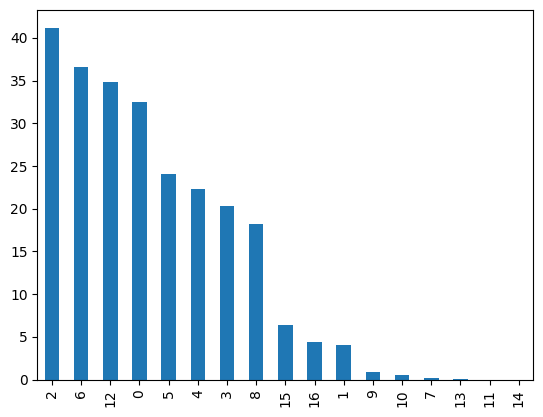

In [8]:
import matplotlib.pyplot as plt
df['現金買入'].plot(kind='bar')
plt.show()

In [9]:
df['幣別'].apply(lambda x: x.split()[-1])

,幣別
2,(GBP)
6,(CHF)
12,(EUR)
0,(USD)
5,(SGD)
4,(CAD)
3,(AUD)
8,(NZD)
15,(MYR)
16,(CNY)


In [2]:
import wget
wget.download('https://github.com/roberthsu2003/__2025_01_04_chihlee__/raw/refs/heads/main/ChineseFont.ttf')

'ChineseFont.ttf'

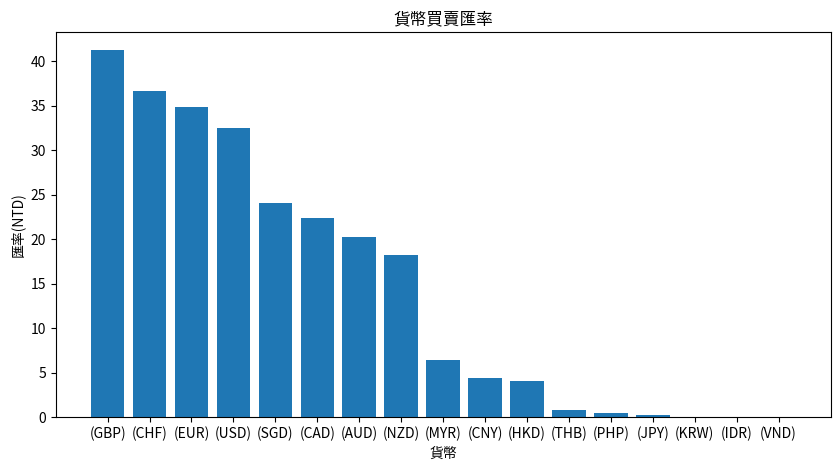

In [10]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import matplotlib as mlp
fontManager.addfont('ChineseFont.ttf')
mlp.rc('font',family = 'ChineseFont')

# 1.製作figure
fig = plt.figure(figsize=(10, 5))
ax_1 = fig.add_subplot(1, 1, 1)
ax_1.bar(df['幣別'].apply(lambda x: x.split()[-1]),df['現金買入'])
ax_1.set_title('貨幣買賣匯率')
ax_1.set_xlabel('貨幣')
ax_1.set_ylabel('匯率(NTD)')
plt.show()